# Navigating A Hedge Maze (Solution)

`NOTE: This should only be attempted after completing the course!`

Let's say you have some data representing a hedge maze:

In [2]:
data = [
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
 ]

Let's plot it to get a better idea of what we're looking at:

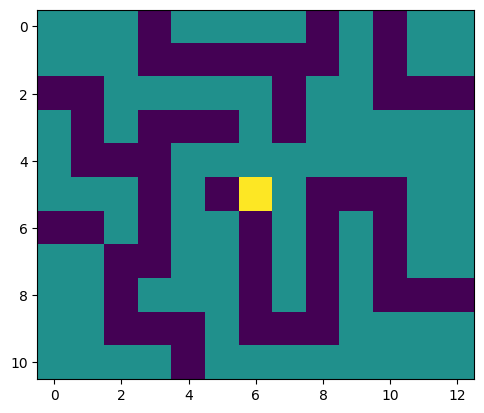

In [3]:
%matplotlib inline
import matplotlib.pyplot as pl

pl.imshow(data)
pl.show()

Here, the `0` represent a path, and `1` represents a wall. The goal is marked with a `2`. 

Given a maze like this, we want to be able to determine the coordinates of the entrance that leads to the goal. (We will always be guaranteed that there is only one valid path to the goal, and **the goal will not always necessarily be at the center of the maze**.)

In this case, the correct coordinates are `(8, 12)`, as the path from those indices leads to the goal.

Write a function called `findEntrance` that can take in a maze like this and give the coordinates for the correct entrance.

Make sure to focus on modularizing your code as much as is necessary to simplify tasks.

In [3]:
def findEntrance(maze):
    visited = [[False for column in row] for row in maze]
    goalRow, goalColumn = findGoalCoordinates(maze)  # Find the goal first, and search outward
    return findEntranceFromPosition(goalRow, goalColumn, maze, visited)

def findGoalCoordinates(maze):
    for row in range(len(maze)):
        for column in range(len(maze[0])):
            if maze[row][column] == 2:
                return row, column

def findEntranceFromPosition(row, column, maze, visited):
    if maze[row][column] == 1 or visited[row][column]:
        return
    
    if atEdge(row, column, maze):
        return row, column

    visited[row][column] = True

    # Down
    entrance = findEntranceFromPosition(row + 1, column, maze, visited)
    if entrance is not None:
        return entrance

    # Up
    entrance = findEntranceFromPosition(row - 1, column, maze, visited)
    if entrance is not None:
        return entrance

    # Right
    entrance = findEntranceFromPosition(row, column + 1, maze, visited)
    if entrance is not None:
        return entrance

    # Left
    entrance = findEntranceFromPosition(row, column - 1, maze, visited)
    if entrance is not None:
        return entrance

def atEdge(row, column, maze):
    topBoundary = 0
    bottomBoundary = len(maze) - 1
    leftBoundary = 0
    rightBoundary = len(maze[0]) - 1
    return row in [topBoundary, bottomBoundary] or column in [leftBoundary, rightBoundary]

If your code is working properly, the cell below will run without any errors:

In [2]:
maze = [
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1],
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

assert findEntrance(maze) == (8, 12)

maze2 = [
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
[1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

assert findEntrance(maze2) == (2, 0)